In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import sys
sys.path.append("..")

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import time
import datetime

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Dense, Flatten, Reshape, Lambda
from tensorflow.keras.models import Model
 
from matplotlib import pyplot as plt

from src.data_loader import data_loader
from src.trainer import VAE

In [3]:
vae_model = VAE()
history, model = vae_model.train()

Epoch 1/100
282/282 [==============================] - 50s 143ms/step - loss: 0.1354 - val_loss: 0.1166
Epoch 2/100
282/282 [==============================] - 41s 140ms/step - loss: 0.1072 - val_loss: 0.1080
Epoch 3/100
282/282 [==============================] - 42s 141ms/step - loss: 0.1003 - val_loss: 0.1044
Epoch 4/100
282/282 [==============================] - 41s 138ms/step - loss: 0.0956 - val_loss: 0.0991
Epoch 5/100
282/282 [==============================] - 41s 139ms/step - loss: 0.0925 - val_loss: 0.0977
Epoch 6/100
282/282 [==============================] - 40s 135ms/step - loss: 0.0902 - val_loss: 0.0969
Epoch 7/100
282/282 [==============================] - 41s 137ms/step - loss: 0.0883 - val_loss: 0.0948
Epoch 8/100
282/282 [==============================] - 41s 138ms/step - loss: 0.0867 - val_loss: 0.0939
Epoch 9/100
282/282 [==============================] - 41s 140ms/step - loss: 0.0849 - val_loss: 0.0922
Epoch 10/100
282/282 [==============================] - 40s 136m

In [4]:
model.summary()

Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 encoder (Functional)        [(None, 256),             134385344 
                              (None, 256),                       
                              (None, 256)]                       
                                                                 
 decoder (Functional)        (None, 256, 256, 3)       17599683  
                                                                 
Total params: 151985027 (579.78 MB)
Trainable params: 151985027 (579.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
train_dataset, test_dataset = data_loader()

In [41]:
# vae_model.save("../saved_models/vae/vae.keras")

In [6]:
def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(12, 4))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'Ground Truth', 'Predicted Image']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # Getting the pixel values in the [0, 1] range to plot.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

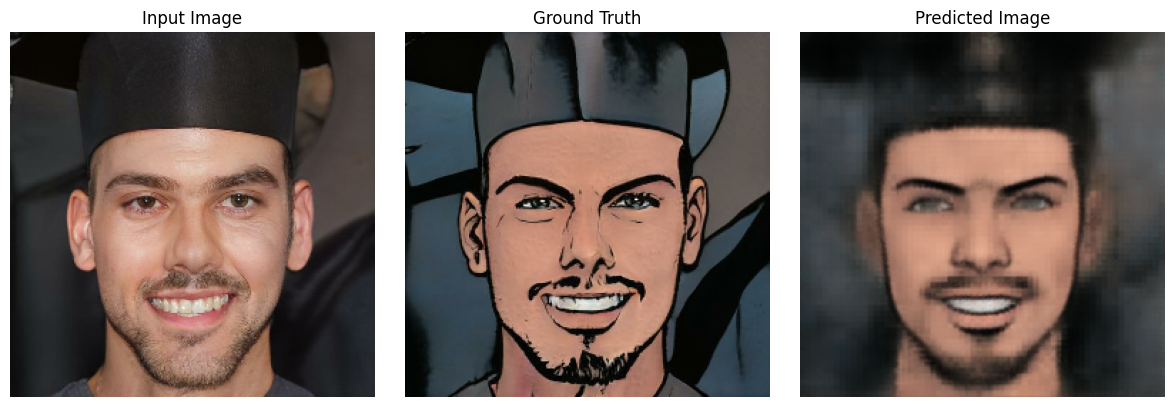

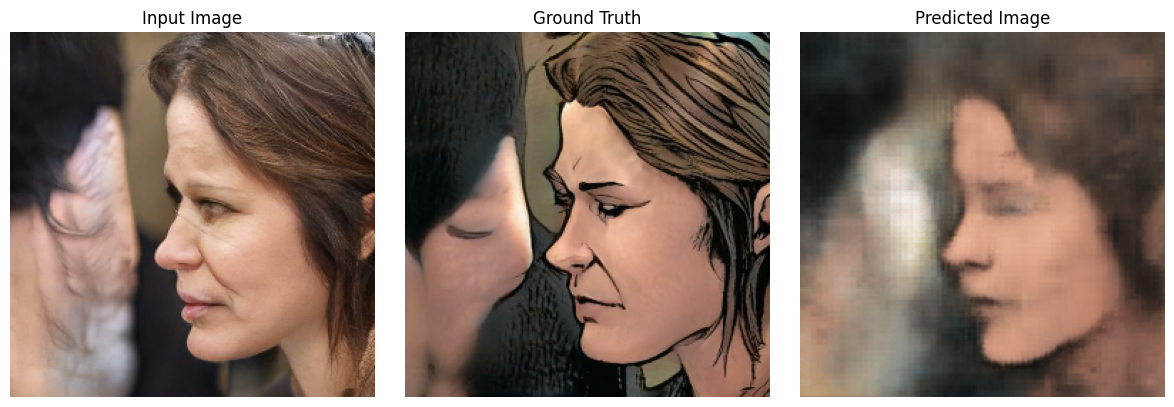

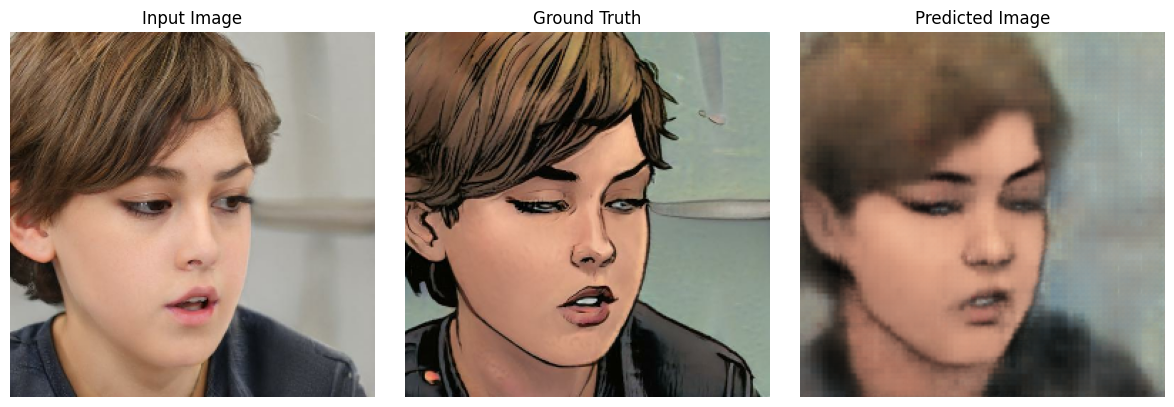

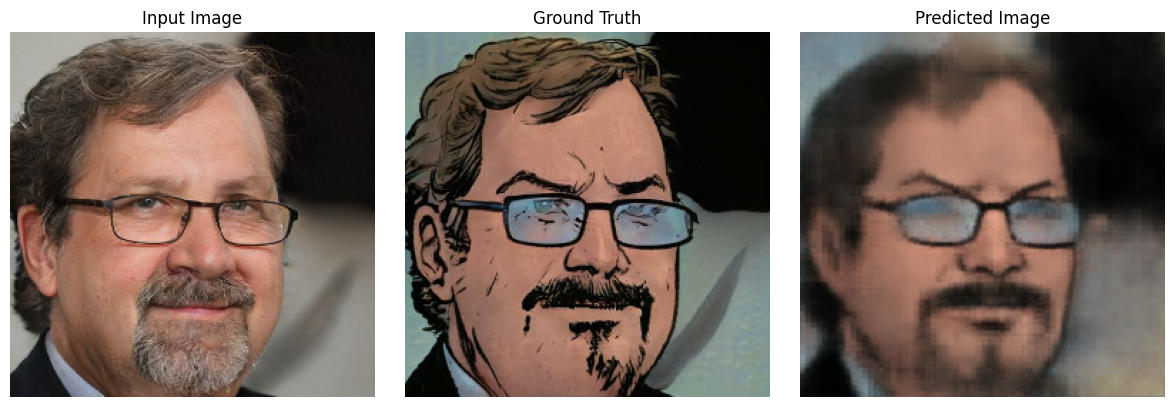

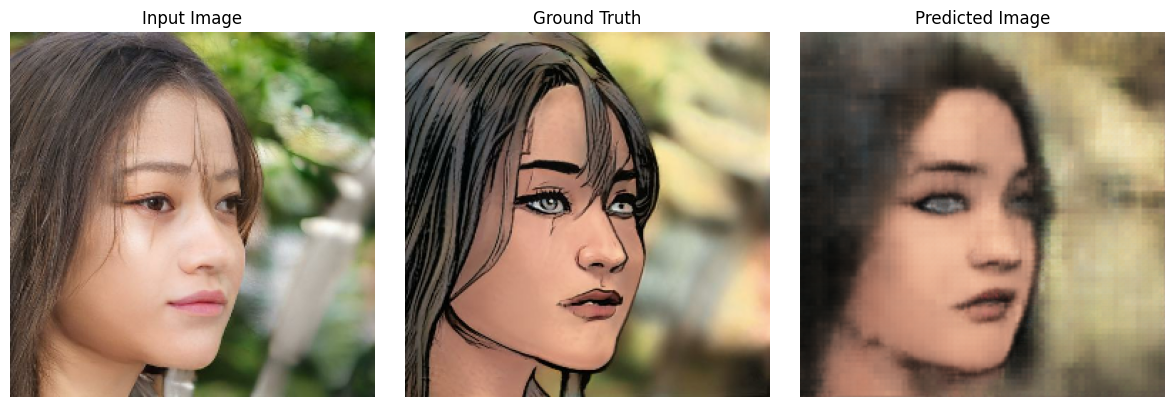

In [8]:
for inp, tar in test_dataset.take(5):
    generate_images(model, inp, tar)